In [2]:
%reload_ext autoreload
%autoreload 2

from cleaner_rotcurves import *
from ploter import *
import matplotlib.pyplot as plt
import scipy

In [3]:
rotcurve_properties_df

,name,max_R,max_Vc
1,No name,22.320000,254.960000
2,100224,12.200000,263.320000
3,100253,7.483100,217.199997
4,100342,6.490000,198.970000
5,100598,14.950000,132.010000
...,...,...,...
225,611707,8.940000,98.440000
226,611861,10.550000,163.440000
227,611909,7.730000,158.730000
228,912391,12.500000,176.070000


In [4]:
# plot_rotcurve(40)

In [5]:
G = 4.3009172706e-3 # pc Msun^-1 (km/s)^2 ver https://en.wikipedia.org/wiki/Gravitational_constant
# Magnitud en banda B
def absolute_mag_B(v_max, galaxy_type):
    if galaxy_type == "a":
        a0 = 9.95
        a1 = 3.15
    elif galaxy_type == "b":
        a0 = 10.2
        a1 = 2.71
    elif galaxy_type == "c":
        a0 = 11.0
        a1 = 3.31

    M_B = -a0*np.log10(v_max) + a1
    return M_B

def Luminosity_B(M_B):
    M_B_sun = 5.48 # ver https://en.wikipedia.org/wiki/Apparent_magnitude (absolute magnitude)
    L_B = 10**(0.4*(M_B_sun - M_B)) #L_sun
    return L_B

def R25(M_B):
    log_R25 = -0.249*M_B - 4.0
    return 10**log_R25

def mass(v_max, R):
    mass = v_max**2*R/G
    return mass

def mass_gas(mass, galaxy_type):
    if galaxy_type == "a":
        return 0.04*mass
    elif galaxy_type == "b":
        return 0.08*mass
    else:
        return 0.16*mass

In [6]:
R25(10)

3.235936569296281e-07

In [35]:
df = rotcurve_properties_df

# Parte de clasificación
df["galaxy_type"] = "b"

# Parte de deducción según el tipo de galaxia
df["M_B"] = df.apply(lambda row: absolute_mag_B(row["max_Vc"], row["galaxy_type"]), axis=1)
df["L_B"] = df["M_B"].apply(Luminosity_B)
df["R25"] = df["M_B"].apply(R25)
df["mass"] = df.apply(lambda row: mass(row["max_Vc"], row["R25"]), axis=1)
df["mass_8"] = df.apply(lambda row: mass(row["max_Vc"], 8), axis=1)
df["mass_gas"] = df.apply(lambda row: mass_gas(row["mass"], row["galaxy_type"]), axis=1)

In [36]:
df

,name,max_R,max_Vc,galaxy_type,M_B,L_B,R25,mass,mass_8,mass_gas
1,No name,22.320000,254.960000,b,-21.836015,8.441235e+10,27.363252,4.135716e+08,1.209130e+08,3.308573e+07
2,100224,12.200000,263.320000,b,-21.978935,9.628843e+10,29.699892,4.788081e+08,1.289723e+08,3.830465e+07
3,100253,7.483100,217.199997,b,-21.125970,4.389227e+10,18.212374,1.997676e+08,8.775028e+07,1.598141e+07
4,100342,6.490000,198.970000,b,-20.737634,3.069399e+10,14.577087,1.341791e+08,7.363836e+07,1.073433e+07
5,100598,14.950000,132.010000,b,-18.920190,5.755405e+09,5.141943,2.083434e+07,3.241474e+07,1.666747e+06
...,...,...,...,...,...,...,...,...,...,...
225,611707,8.940000,98.440000,b,-17.620350,1.738362e+09,2.440435,5.498565e+06,1.802487e+07,4.398852e+05
226,611861,10.550000,163.440000,b,-19.866255,1.375631e+10,8.844994,5.493551e+07,4.968732e+07,4.394841e+06
227,611909,7.730000,158.730000,b,-19.736722,1.220924e+10,8.211902,4.810616e+07,4.686482e+07,3.848493e+06
228,912391,12.500000,176.070000,b,-20.195991,1.863787e+10,10.685668,7.702139e+07,5.766332e+07,6.161711e+06


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Galaxia 229: 6122761'}, xlabel='R (Kpc)', ylabel='Vc (km/s)'>)

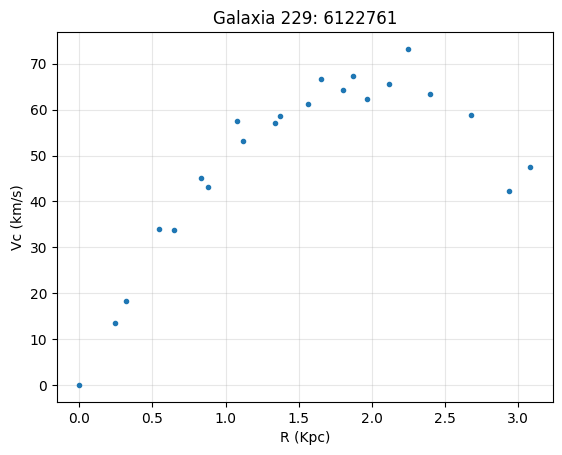

In [9]:
plot_rotcurve(229)

(0.0, 1.0)

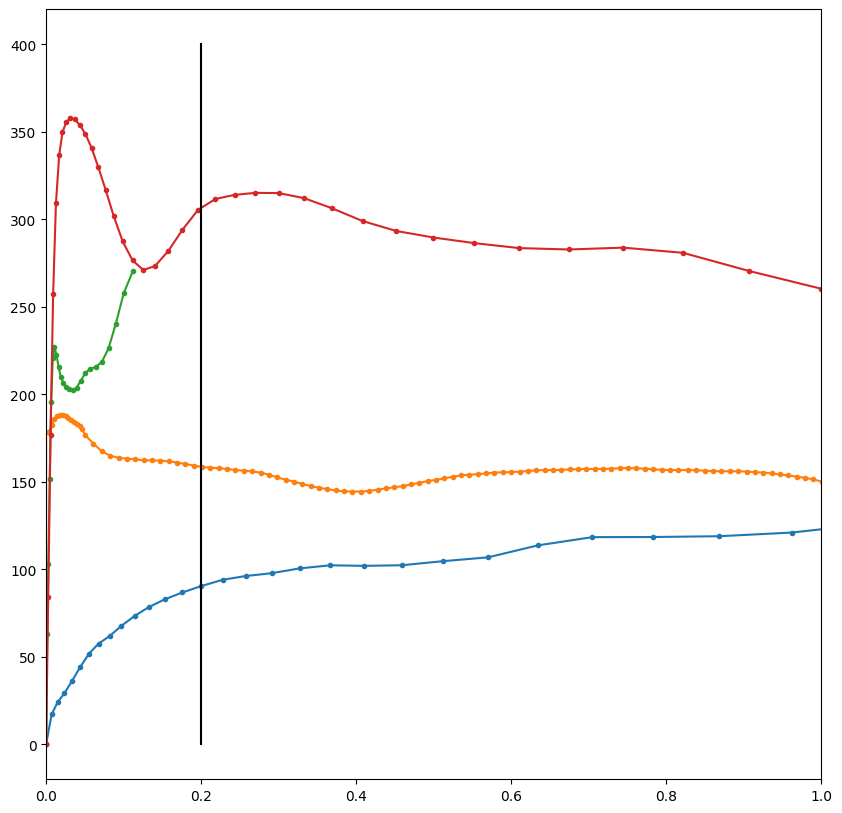

In [44]:
n = 200

sup_lim = 0.2

fig = plt.figure(figsize=(10, 10))
plot_ = lambda n:plt.plot(Rotcurves[n].R/df["R25"].iloc[n], Rotcurves[n].Vc, '.-', label=f"{n}")

for i in range(0,10):
    max_R_Vc_over_R25 = df["max_R"].iloc[i]/df["R25"].iloc[i]

    if max_R_Vc_over_R25 <= sup_lim :
    # if True:
        plot_(i)
        # plt.scatter(max_R_Vc_over_R25, df["max_Vc"].iloc[i], c="k")
        

plt.plot([sup_lim, sup_lim], [0, 400], '-k')

plt.xlim(0,1)
# plt.ylim(0, 300)

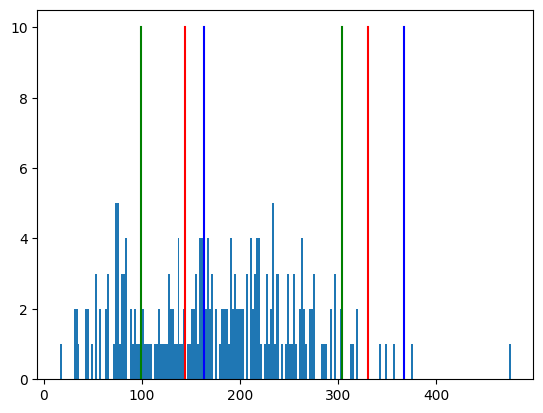

In [ ]:
# plt.hist(df["max_Vc"], bins=230)
# max_ = 10
# plt.plot([163, 163], [0, max_], '-b')
# plt.plot([367, 367], [0, max_], '-b')
# plt.plot([144, 144], [0, max_], '-r')
# plt.plot([330, 330], [0, max_], '-r')
# plt.plot([99, 99], [0, max_], '-g')
# plt.plot([304, 304], [0, max_], '-g')


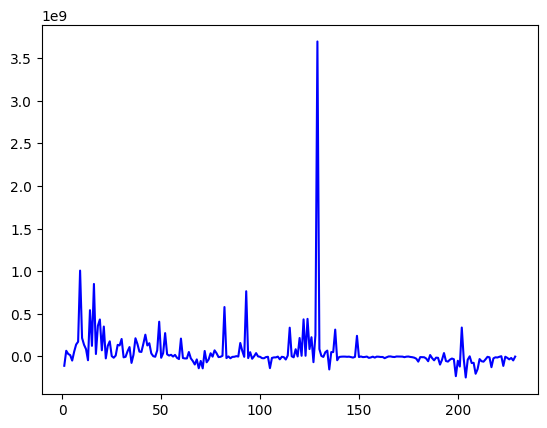

In [ ]:
plt.plot(-df["mass"]+df["mass_R25"], c="b")